<a href="https://colab.research.google.com/github/dckakon/Tensorflow-Project/blob/master/Keras_Deeplizard__01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation and Processin

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels=[]
train_samples=[]
test_labels=[]
test_samples=[]

In [ ]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
for i in train_labels:
  print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [ ]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)


test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

## Keras model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices= tf.config.experimental.list_physical_devices('GPU')
print('Num of GPU Avaiable:',len(physical_devices))
if physical_devices:
  # Set memory growth for the first GPU
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
  print("No GPUs found. Using CPU instead.")

Num of GPU Avaiable: 0
No GPUs found. Using CPU instead.


In [ ]:
model=Sequential([
    Dense(16,input_shape=(1,),activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.3, batch_size=10,epochs=10,shuffle=True,verbose=2)

Epoch 1/10
147/147 - 3s - 20ms/step - accuracy: 0.4592 - loss: 0.7522 - val_accuracy: 0.3825 - val_loss: 0.7260
Epoch 2/10
147/147 - 1s - 7ms/step - accuracy: 0.3898 - loss: 0.7037 - val_accuracy: 0.6048 - val_loss: 0.6838
Epoch 3/10
147/147 - 1s - 5ms/step - accuracy: 0.6755 - loss: 0.6631 - val_accuracy: 0.7524 - val_loss: 0.6377
Epoch 4/10
147/147 - 1s - 4ms/step - accuracy: 0.7463 - loss: 0.6247 - val_accuracy: 0.7857 - val_loss: 0.6054
Epoch 5/10
147/147 - 0s - 3ms/step - accuracy: 0.7646 - loss: 0.5976 - val_accuracy: 0.8111 - val_loss: 0.5787
Epoch 6/10
147/147 - 1s - 5ms/step - accuracy: 0.7918 - loss: 0.5722 - val_accuracy: 0.8238 - val_loss: 0.5516
Epoch 7/10
147/147 - 0s - 3ms/step - accuracy: 0.8204 - loss: 0.5469 - val_accuracy: 0.8365 - val_loss: 0.5253
Epoch 8/10
147/147 - 1s - 4ms/step - accuracy: 0.8333 - loss: 0.5215 - val_accuracy: 0.8556 - val_loss: 0.4990
Epoch 9/10
147/147 - 0s - 2ms/step - accuracy: 0.8503 - loss: 0.4980 - val_accuracy: 0.8619 - val_loss: 0.4760


## Predict

In [ ]:
prediction=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)
prediction

array([[0.21135037, 0.7886497 ],
       [0.67026234, 0.3297376 ],
       [0.54443973, 0.45556018],
       [0.20820221, 0.7917977 ],
       [0.6009957 , 0.39900425],
       [0.46203548, 0.5379645 ],
       [0.4375121 , 0.56248784],
       [0.23622741, 0.7637725 ],
       [0.22100292, 0.77899706],
       [0.45383462, 0.5461654 ],
       [0.23622741, 0.7637725 ],
       [0.71739775, 0.28260234],
       [0.39736533, 0.6026348 ],
       [0.27987856, 0.72012144],
       [0.35855398, 0.641446  ],
       [0.32876024, 0.67123973],
       [0.21453321, 0.78546685],
       [0.33609182, 0.66390824],
       [0.71575755, 0.28424248],
       [0.4702569 , 0.5297431 ],
       [0.24171641, 0.7582836 ],
       [0.3661876 , 0.6338125 ],
       [0.5362342 , 0.46376583],
       [0.54443973, 0.45556018],
       [0.22428979, 0.7757102 ],
       [0.54443973, 0.45556018],
       [0.24782348, 0.7521765 ],
       [0.63247305, 0.36752698],
       [0.67758125, 0.32241878],
       [0.7051593 , 0.29484075],
       [0.

In [ ]:
rounded_predictions=np.argmax(prediction,axis=1)
rounded_predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import itertools

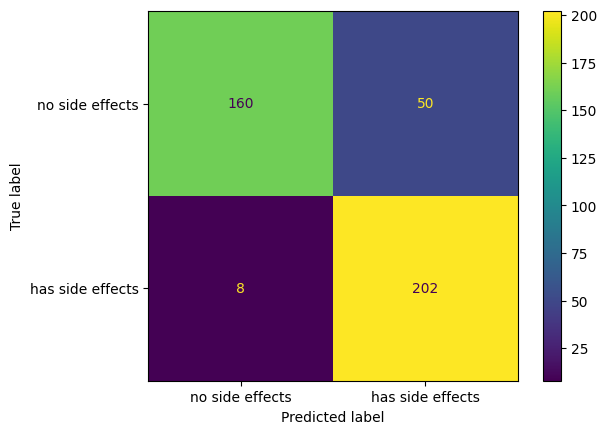

In [ ]:
# Instead of using from_estimator, use from_predictions which takes true labels and predicted labels
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no side effects','has side effects']) # Assuming your labels are 0 and 1
disp.plot()
plt.show()

## Model save

In [ ]:
model.save('models/medical_trail_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('models/medical_trail_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
new_model.get_weights()

[array([[ 0.5129017 , -0.48533136,  0.18196127, -0.06271428,  0.5193435 ,
          0.5800358 ,  0.48480752,  0.03929089,  0.51355076,  0.38763922,
         -0.3368616 ,  0.09710718,  0.49291238,  0.11115813, -0.16040334,
         -0.47340626]], dtype=float32),
 array([ 0.03332105,  0.        ,  0.10956378,  0.        , -0.0828131 ,
        -0.07799341,  0.07370168,  0.08962014, -0.07887203, -0.06073676,
         0.        ,  0.1197864 , -0.08730268,  0.01618769,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.07062068,  0.23391719,  0.13163906, -0.26442868,  0.17345253,
          0.23538104,  0.2090653 ,  0.16961406, -0.00888193, -0.34877947,
          0.2679985 , -0.31922245, -0.340844  , -0.22749637,  0.04654764,
          0.0269289 ,  0.31093115, -0.1958473 , -0.09881324,  0.05061066,
         -0.03041682,  0.13449779,  0.21945584, -0.08943944, -0.32552093,
          0.24925157, -0.05017679, -0.17425387, -0.20808546, -0.3453238 ,
          0.32555968,  0.40482634],
 

In [ ]:
new_model.optimizer

In [ ]:
json_string= model.to_json()

json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer_3"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constra

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)
model_architecture.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)